In [3]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf


In [18]:
start_date = '2017-01-01'
end_date= '2022-06-01'
symbol = 'ETH-USD'
# df = DataReader(name=symbol, data_source='yahoo', start=start_date, end=end_date)
yf.pdr_override()
df = pdr.get_data_yahoo('SPY', start='2022-10-24', end='2022-12-23')
df.head()

# spy = pdr.get_data_yahoo('ETH-USD', start='2022-10-24', end='2022-12-23')
# spy.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-24,375.890015,380.059998,373.109985,378.869995,374.313904,85436900
2022-10-25,378.790009,385.250000,378.670013,384.920013,380.291107,78846300
2022-10-26,381.619995,387.579987,381.350006,382.019989,377.425964,104087300
2022-10-27,383.070007,385.000000,379.329987,379.980011,375.410522,81971800
2022-10-28,379.869995,389.519989,379.679993,389.019989,384.341766,100302000


In [19]:
df["MA_12"] = df["Adj Close"].rolling(window=12).mean()
df["MA_21"] = df["Adj Close"].rolling(window=21).mean()
df.loc[df["MA_12"] > df["MA_21"], "Signal"] = 1
df.loc[df["MA_12"] <= df["MA_21"], "Signal"] = 0
df["Signal"] = df["Signal"].shift(1)
df.tail(3)


,Open,High,Low,Close,Adj Close,Volume,MA_12,MA_21,Signal
Date,,,,,,,,,
2022-12-20,379.230011,382.230011,377.850006,380.540009,377.690216,74427200,388.202522,391.778082,0.0
2022-12-21,383.250000,387.410004,382.690002,386.230011,383.337616,78167400,387.248601,391.468215,0.0
2022-12-22,383.049988,386.209991,374.769989,380.720001,377.868866,100120900,386.313176,390.648115,0.0


In [20]:
df["lrets_bench"] = np.log(df["Adj Close"]/df["Adj Close"].shift(1))
df["lrets_prod_bench"] = df["lrets_bench"].cumsum()
df["prod_bench"] = np.exp(df["lrets_prod_bench"]) - 1
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,MA_12,MA_21,Signal,lrets_bench,lrets_prod_bench,prod_bench
Date,,,,,,,,,,,,
2022-10-24,375.890015,380.059998,373.109985,378.869995,374.313904,85436900,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-25,378.790009,385.250000,378.670013,384.920013,380.291107,78846300,NaN,NaN,NaN,0.015842,0.015842,0.015968
2022-10-26,381.619995,387.579987,381.350006,382.019989,377.425964,104087300,NaN,NaN,NaN,-0.007563,0.008280,0.008314


In [21]:
# Strategy returns
df["lrets_strat"] = np.log(df["Open"].shift(-1)/df["Open"]) * df["Signal"]
df["lrets_prod_strat"] = df["lrets_strat"].cumsum()
df["prod_strat"] = np.exp(df["lrets_prod_strat"]) - 1
df.tail(3)

,Open,High,Low,Close,Adj Close,Volume,MA_12,MA_21,Signal,lrets_bench,lrets_prod_bench,prod_bench,lrets_strat,lrets_prod_strat,prod_strat
Date,,,,,,,,,,,,,,,
2022-12-20,379.230011,382.230011,377.850006,380.540009,377.690216,74427200,388.202522,391.778082,0.0,0.001367,0.008980,0.009020,0.0,-0.033742,-0.03318
2022-12-21,383.250000,387.410004,382.690002,386.230011,383.337616,78167400,387.248601,391.468215,0.0,0.014842,0.023821,0.024107,-0.0,-0.033742,-0.03318
2022-12-22,383.049988,386.209991,374.769989,380.720001,377.868866,100120900,386.313176,390.648115,0.0,-0.014369,0.009452,0.009497,NaN,NaN,NaN


In [22]:
# Remove NaN'set
df.dropna(inplace=True)

# Plot Results

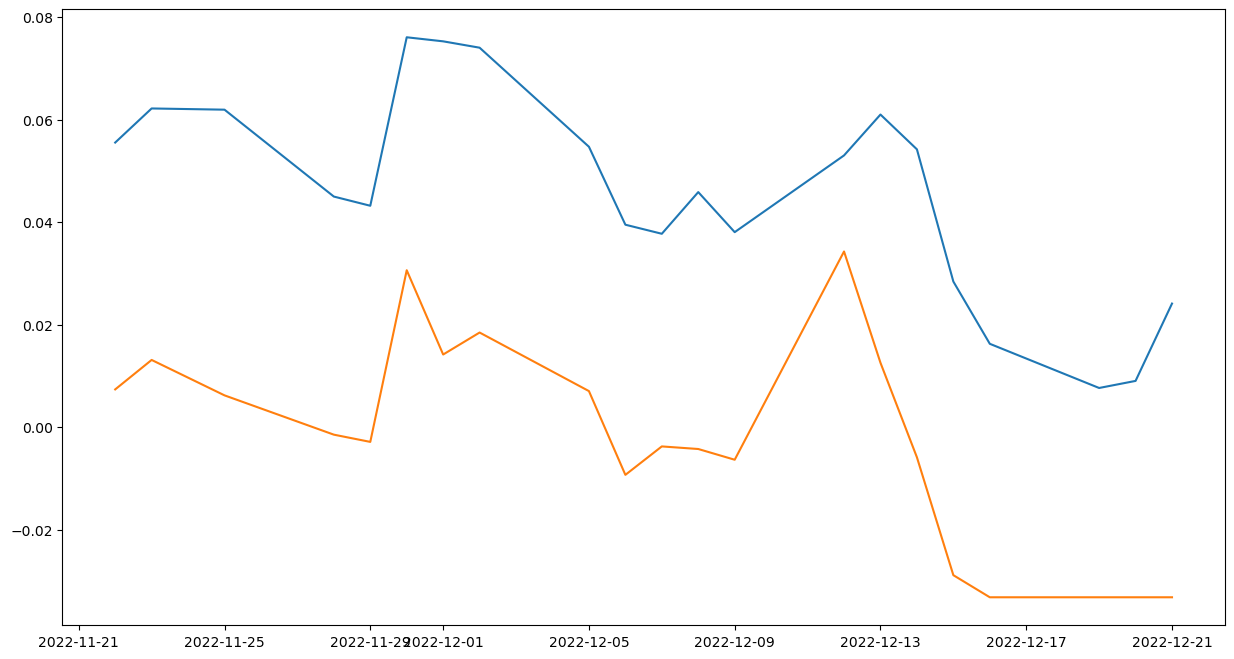

In [23]:
# Show Graph
fig = plt.figure(figsize=(15,8))
plt.plot(df["prod_bench"])
plt.plot(df["prod_strat"])
plt.show()

## Calcualte Returns

In [24]:
print("Benchmark Returns: ", df["prod_bench"].iloc[-1])
print("Strategy Returns: ", df["prod_strat"].iloc[-1])


Benchmark Returns:  0.0241073389644042
Strategy Returns:  -0.03317954642891319


In [27]:
# Calculate Sharpe
def calculate_sharpe(returns):
    N = 255
    rf = 0.01
    SQRT_N = np.sqrt(N)
    mean = (returns.mean())*N
    sigma = returns.std() * SQRT_N
    sharpe = round( (mean-rf) /sigma, 3) 
    return sharpe
    

In [28]:
bench_sharpe = calculate_sharpe(df["lrets_bench"].values)
strat_sharpe = calculate_sharpe(df["lrets_strat"].values)
print("Benchmark Returns: ", bench_sharpe)
print("Strategy Returns: ", strat_sharpe)


Benchmark Returns:  -1.049
Strategy Returns:  -1.721
